In [11]:
import pandas as pd
import numpy as np
# Plot the performance
import matplotlib.pyplot as plt
import math
from functools import reduce
import os

In [12]:
# Get the current working directory
current_dir = os.getcwd()
# Define the path to the folder in the parent directory
data_folder_path = os.path.join(current_dir, "data")

# Define the file path for SP500 data
file_name = 'sp500_data.csv'
file_path = os.path.join(data_folder_path, file_name)

# Load the text file into a DataFrame
# Adjust parameters like delimiter, header, and column names as needed
df_full = pd.read_csv(file_path, delimiter=",", header=0)

# Convert the column to a date format
df_full['date'] = pd.to_datetime(df_full['date'], errors='coerce')
df_full = df_full.sort_values(by='date').reset_index(drop=True)
# Display the first few rows of the DataFrame
df_full

,date,Price,High,Low,Open,Volume
0,1975-01-02,70.230003,70.919998,68.650002,0.000000,14800000
1,1975-01-03,70.709999,71.639999,69.290001,0.000000,15270000
2,1975-01-06,71.070000,72.239998,70.330002,0.000000,17550000
3,1975-01-07,71.019997,71.750000,69.919998,0.000000,14890000
4,1975-01-08,70.040001,71.529999,69.650002,0.000000,15600000
...,...,...,...,...,...,...
12603,2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000
12604,2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000
12605,2024-12-27,5970.839844,6006.169922,5932.950195,6006.169922,3159610000
12606,2024-12-30,5906.939941,5940.790039,5869.160156,5920.669922,3433250000


In [16]:
df_letf = pd.DataFrame()
df_letf['date'] = df_full['date']
df_letf['spy_price'] = df_full['Price']
df_letf['Volume'] = df_full['Volume']

start_date = '1991-04-04'

df_letf = df_letf[df_letf['date'] >= start_date]
df_letf = df_letf.reset_index(drop=True)
# Calculate percentage change
df_letf['spy_daily_pct_change'] = df_letf['spy_price'].pct_change()
# Set the first row to 0
df_letf.loc[0, 'spy_daily_pct_change'] = 0

In [17]:
leverage = 2
df_letf['2x_daily_pct_change'] = df_letf['spy_daily_pct_change'] * leverage

In [18]:
leverage = 3
df_letf['3x_daily_pct_change'] = df_letf['spy_daily_pct_change'] * leverage

In [19]:
leverage = 10
df_letf['10x_daily_pct_change'] = df_letf['spy_daily_pct_change'] * leverage

In [20]:
df_letf

,date,spy_price,Volume,spy_daily_pct_change,2x_daily_pct_change,3x_daily_pct_change,10x_daily_pct_change
0,1991-04-04,379.769989,198120000,0.000000,0.000000,0.000000,0.000000
1,1991-04-05,375.359985,187410000,-0.011612,-0.023225,-0.034837,-0.116123
2,1991-04-08,378.660004,138580000,0.008792,0.017583,0.026375,0.087916
3,1991-04-09,373.559998,169940000,-0.013469,-0.026937,-0.040406,-0.134686
4,1991-04-10,373.149994,167940000,-0.001098,-0.002195,-0.003293,-0.010976
...,...,...,...,...,...,...,...
8495,2024-12-24,6040.040039,1757720000,0.011043,0.022086,0.033128,0.110428
8496,2024-12-26,6037.589844,2904530000,-0.000406,-0.000811,-0.001217,-0.004057
8497,2024-12-27,5970.839844,3159610000,-0.011056,-0.022111,-0.033167,-0.110557
8498,2024-12-30,5906.939941,3433250000,-0.010702,-0.021404,-0.032106,-0.107020


In [9]:
# Start SPXL with the same initial value as SPY (optional)
initial_price = 1  # Starting price for SPXL
df_letf['1x_price'] = initial_price * (1 + df_letf['spy_daily_pct_change']).cumprod()
df_letf['2x_price'] = initial_price * (1 + df_letf['2x_daily_pct_change']).cumprod()
df_letf['3x_price'] = initial_price * (1 + df_letf['3x_daily_pct_change']).cumprod()
df_letf['10x_price'] = initial_price * (1 + df_letf['10x_daily_pct_change']).cumprod()
df_letf['spy_norm'] = df_letf['spy_price'] / df_letf.iloc[0]["spy_price"]

df_letf

,date,spy_price,Volume,spy_daily_pct_change,2x_daily_pct_change,3x_daily_pct_change,10x_daily_pct_change,1x_price,2x_price,3x_price,10x_price,spy_norm
0,1991-04-04,379.769989,198120000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
1,1991-04-05,375.359985,187410000,-0.011612,-0.023225,-0.034837,-0.116123,0.988388,0.976775,0.965163,8.838770e-01,0.988388
2,1991-04-08,378.660004,138580000,0.008792,0.017583,0.026375,0.087916,0.997077,0.993950,0.990619,9.615840e-01,0.997077
3,1991-04-09,373.559998,169940000,-0.013469,-0.026937,-0.040406,-0.134686,0.983648,0.967176,0.950592,8.320724e-01,0.983648
4,1991-04-10,373.149994,167940000,-0.001098,-0.002195,-0.003293,-0.010976,0.982568,0.965053,0.947462,8.229400e-01,0.982568
...,...,...,...,...,...,...,...,...,...,...,...,...
8495,2024-12-24,6040.040039,1757720000,0.011043,0.022086,0.033128,0.110428,15.904469,82.954977,138.907069,-2.691145e-13,15.904469
8496,2024-12-26,6037.589844,2904530000,-0.000406,-0.000811,-0.001217,-0.004057,15.898017,82.887674,138.738022,-2.680228e-13,15.898017
8497,2024-12-27,5970.839844,3159610000,-0.011056,-0.022111,-0.033167,-0.110557,15.722253,81.054905,134.136469,-2.383909e-13,15.722253
8498,2024-12-30,5906.939941,3433250000,-0.010702,-0.021404,-0.032106,-0.107020,15.553994,79.320007,129.829885,-2.128783e-13,15.553994


In [8]:
def find_price_on_date(date, df, col):
    return df[df['date'] == date][col].values[0]
def cagr_calc(final_value, initial_value, years):
    return round(100 * ((final_value / initial_value) ** (1 / years) - 1),2)
def portfolio_performamce(num_years, entry, exit, start, portfolio_name):
    tax = 0.0
    only_spx = round(start * exit/entry,1)
    only_spx_profit_net = (only_spx - start) * (1-tax)
    only_spx_exit = start + only_spx_profit_net
    only_spx_pct = round(100 * ((only_spx_exit/start) - 1),1)
    cagr_spx = cagr_calc(only_spx_exit, start, num_years)
    print(f'{portfolio_name}: {only_spx_exit} --> {only_spx_pct}% --> cagr = {cagr_spx}%')

In [11]:
entry_date, exit_date = start_date, '2024-12-31'
# Calculate number of years
num_years = (pd.to_datetime(exit_date) - pd.to_datetime(entry_date)).days / 365.25  # Account for leap years
print(num_years)
spy_entry, spy_exit = find_price_on_date(entry_date, df_letf, 'spy_price'), find_price_on_date(exit_date, df_letf, 'spy_price')
amumbo_entry, amumbo_exit = find_price_on_date(entry_date, df_letf, '2x_price'), find_price_on_date(exit_date, df_letf, '2x_price')
spxl_entry, spxl_exit = find_price_on_date(entry_date, df_letf, '3x_price'), find_price_on_date(exit_date, df_letf, '3x_price')



33.74401095140315


In [12]:
portfolio_performamce(num_years, spy_entry, spy_exit, 1, 'SPY')
portfolio_performamce(num_years, amumbo_entry, amumbo_exit, 1, 'SPY2x')
portfolio_performamce(num_years, spxl_entry, spxl_exit, 1, 'SPY3x')

SPY: 15.5 --> 1450.0% --> cagr = 8.46%
SPY2x: 78.6 --> 7760.0% --> cagr = 13.81%
SPY3x: 128.2 --> 12720.0% --> cagr = 15.47%


In [10]:
df_letf.to_csv('spxl_generated.csv', index=False)

In [12]:
# import yfinance as yf
# sp500 = yf.download('^GSPC', start='1975-01-01', end='2025-01-01')
# sp500.to_csv('sp500_data.csv')


In [13]:
# Get real SPXL data 
# Define the file path
file_name = 'SPXL ETF Stock Price History(1).csv'
file_path = os.path.join(data_folder_path, file_name)

# Load the text file into a DataFrame
# Adjust parameters like delimiter, header, and column names as needed
df_spxl = pd.read_csv(file_path, delimiter=",", header=0)

# Convert the column to a date format
df_spxl['date'] = pd.to_datetime(df_spxl['date'], errors='coerce')
df_spxl = df_spxl.sort_values(by='date').reset_index(drop=True)
# Display the first few rows of the DataFrame
df_spxl['norm_price'] = df_spxl['Price'] / df_spxl['Price'].iloc[0]

df_spxl

,date,Price,Open,high,Low,Vol.,Change %,norm_price
0,2008-11-06,3.60,4.15,4.20,3.55,4.33M,-15.29%,1.000000
1,2008-11-07,3.85,3.71,3.89,3.61,6.98M,6.94%,1.069444
2,2008-11-10,3.70,4.15,4.16,3.58,5.79M,-3.90%,1.027778
3,2008-11-11,3.46,3.54,3.69,3.29,11.48M,-6.49%,0.961111
4,2008-11-12,3.07,3.33,3.33,3.02,13.31M,-11.27%,0.852778
...,...,...,...,...,...,...,...,...
4088,2024-12-24,182.64,178.07,182.75,177.57,2.18M,3.12%,50.733333
4089,2024-12-26,182.65,181.07,183.79,179.81,2.46M,0.01%,50.736111
4090,2024-12-27,176.89,179.05,179.33,172.94,4.01M,-3.15%,49.136111
4091,2024-12-30,170.74,170.43,173.80,167.30,3.73M,-3.48%,47.427778


In [21]:
# Get real Amumbo data 
# Define the file path
file_name = 'SSO ETF Stock Price History.csv'
file_path = os.path.join(data_folder_path, file_name)

# Load the text file into a DataFrame
# Adjust parameters like delimiter, header, and column names as needed
df_sso = pd.read_csv(file_path, delimiter=",", header=0)

# Convert the column to a date format
df_sso['date'] = pd.to_datetime(df_sso['date'], errors='coerce')
df_sso = df_sso.sort_values(by='date').reset_index(drop=True)
# Display the first few rows of the DataFrame
df_sso['norm_price'] = df_sso['Price'] / df_sso['Price'].iloc[0]

df_sso

,date,Price,Open,High,Low,Vol.,Change %,norm_price
0,2008-11-06,3.51,3.80,3.87,3.44,873.36M,-9.54%,1.000000
1,2008-11-07,3.70,3.56,3.70,3.51,641.00M,5.41%,1.054131
2,2008-11-10,3.54,3.84,3.87,3.50,512.93M,-4.32%,1.008547
3,2008-11-11,3.44,3.49,3.59,3.33,700.49M,-2.82%,0.980057
4,2008-11-12,3.10,3.30,3.35,3.07,831.63M,-9.88%,0.883191
...,...,...,...,...,...,...,...,...
4106,2025-02-10,97.72,97.47,97.94,97.05,1.01M,1.33%,27.840456
4107,2025-02-11,97.83,96.97,98.04,96.94,918.74K,0.11%,27.871795
4108,2025-02-12,97.23,95.87,97.61,95.67,2.20M,-0.61%,27.700855
4109,2025-02-13,99.26,97.57,99.33,97.16,3.73M,2.09%,28.279202


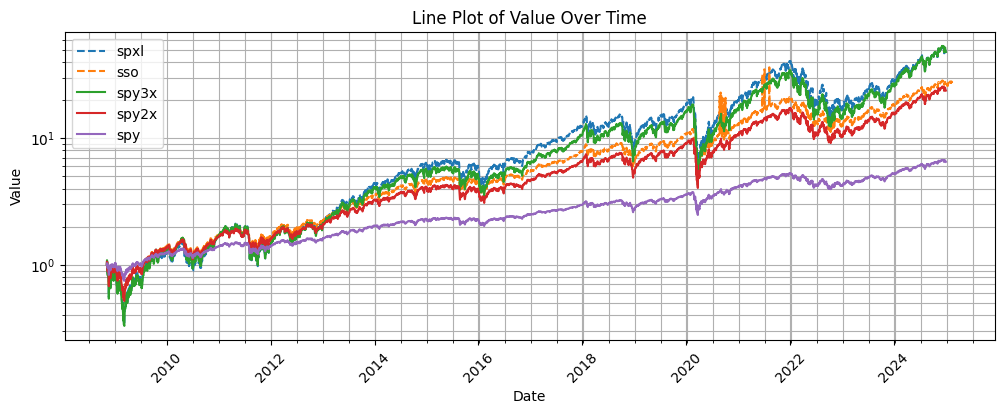

In [24]:
# Plot generated and real data# file_name = 'Amumbo CL2 Historical Data.csv'
plt.figure(figsize=(12, 4))

plt.plot(df_spxl['date'], df_spxl['norm_price'], linestyle='--', label='spxl')
plt.plot(df_sso['date'], df_sso['norm_price'], linestyle='--', label='sso')

plt.plot(df_letf['date'], df_letf['3x_price'], linestyle='-', label='spy3x')
plt.plot(df_letf['date'], df_letf['2x_price'], linestyle='-', label='spy2x')
plt.plot(df_letf['date'], df_letf['spy_price'], linestyle='-', label='spy')
plt.xlabel('Date')
plt.ylabel('Value')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.minorticks_on()  # Enable minor ticks
plt.title('Line Plot of Value Over Time')
plt.xticks(rotation=45)
plt.grid(which='Both')
plt.legend()
plt.show()
